In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_vietnam = pd.read_excel(r'alldatasets.xlsx',sheet_name='Vietnam')

In [3]:
df_vietnam.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,VN011001,Vietnam,170.000000,1,12.0,-0.493371,5.0,NaN,12.0,1,91,5,0.561111,1,1,0.0,0.000000
1,VN011002,Vietnam,153.500000,1,12.0,-0.795860,15.0,3.0,9.0,0,92,6,0.546296,1,1,0.0,0.000000
2,VN011003,Vietnam,158.000000,1,8.0,-1.421140,5.0,7.0,6.0,0,100,5,0.455556,2,1,19200000.0,875.313416
3,VN011004,Vietnam,157.500000,0,12.0,-0.539453,10.0,0.0,9.0,0,94,6,0.592593,5,1,4600000.0,209.710495
4,VN011005,Vietnam,157.600006,0,16.0,-0.297198,10.0,4.0,0.0,0,95,5,0.466667,5,1,2800000.0,127.649872


In [4]:
df_vietnam.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

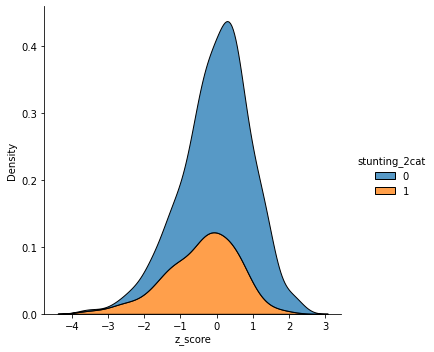

In [6]:
import seaborn as sns
sns.displot(df_vietnam, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_vietnam[['z_score']]
X = df_vietnam[['stunting_2cat']]

In [8]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_vietnam, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 25 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.116,0.040,0.041,0.190,0.001,0.000,4401.0,4259.0,4391.0,4012.0,1.0
stunting_2cat,-0.529,0.074,-0.669,-0.393,0.001,0.001,4341.0,4341.0,4356.0,4335.0,1.0
sd,0.939,0.024,0.895,0.985,0.000,0.000,5834.0,5834.0,5816.0,4024.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

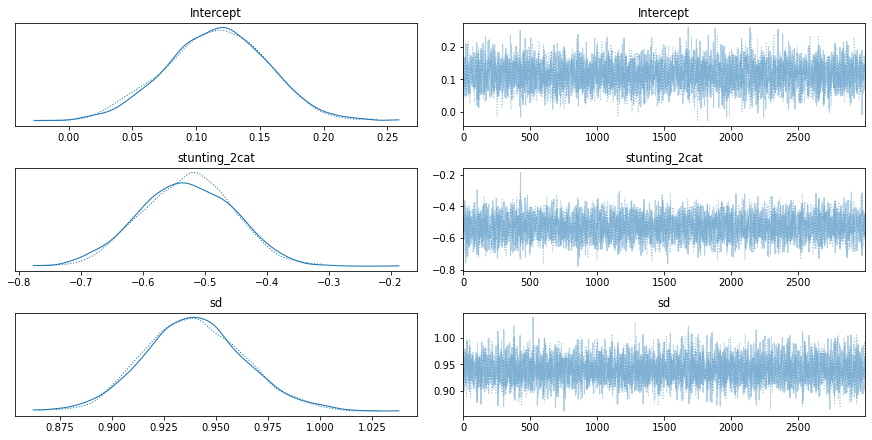

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_vietnam['z_score']
X = df_vietnam[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1),
        'agegapr1': pm.Normal.dist(mu=1, sigma=1),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=1),
        'chsexr1': pm.Normal.dist(mu=1, sigma=1),
        'agemonr1': pm.Normal.dist(mu=1, sigma=1),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=1),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=1)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_vietnam, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 122 seconds.


In [17]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.671,0.862,-0.894,2.310,0.012,0.009,5063.0,4504.0,5079.0,5557.0,1.0
stunting_2cat,-0.287,0.068,-0.412,-0.159,0.001,0.001,7419.0,7259.0,7430.0,6632.0,1.0
agegapr1,0.002,0.010,-0.019,0.020,0.000,0.000,8534.0,4906.0,8542.0,6655.0,1.0
momeduyrsr1,0.039,0.009,0.023,0.055,0.000,0.000,8205.0,8154.0,8211.0,6896.0,1.0
chsexr1,-0.238,0.060,-0.350,-0.127,0.001,0.000,8244.0,8230.0,8254.0,7206.0,1.0
agemonr1,-0.010,0.009,-0.027,0.006,0.000,0.000,5084.0,4579.0,5100.0,5411.0,1.0
wi_newr1,1.637,0.164,1.339,1.950,0.002,0.001,10255.0,10215.0,10260.0,7706.0,1.0
hhsizer1,-0.089,0.020,-0.127,-0.052,0.000,0.000,8474.0,8110.0,8503.0,6850.0,1.0
sd,0.802,0.021,0.763,0.841,0.000,0.000,7886.0,7886.0,7862.0,5619.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

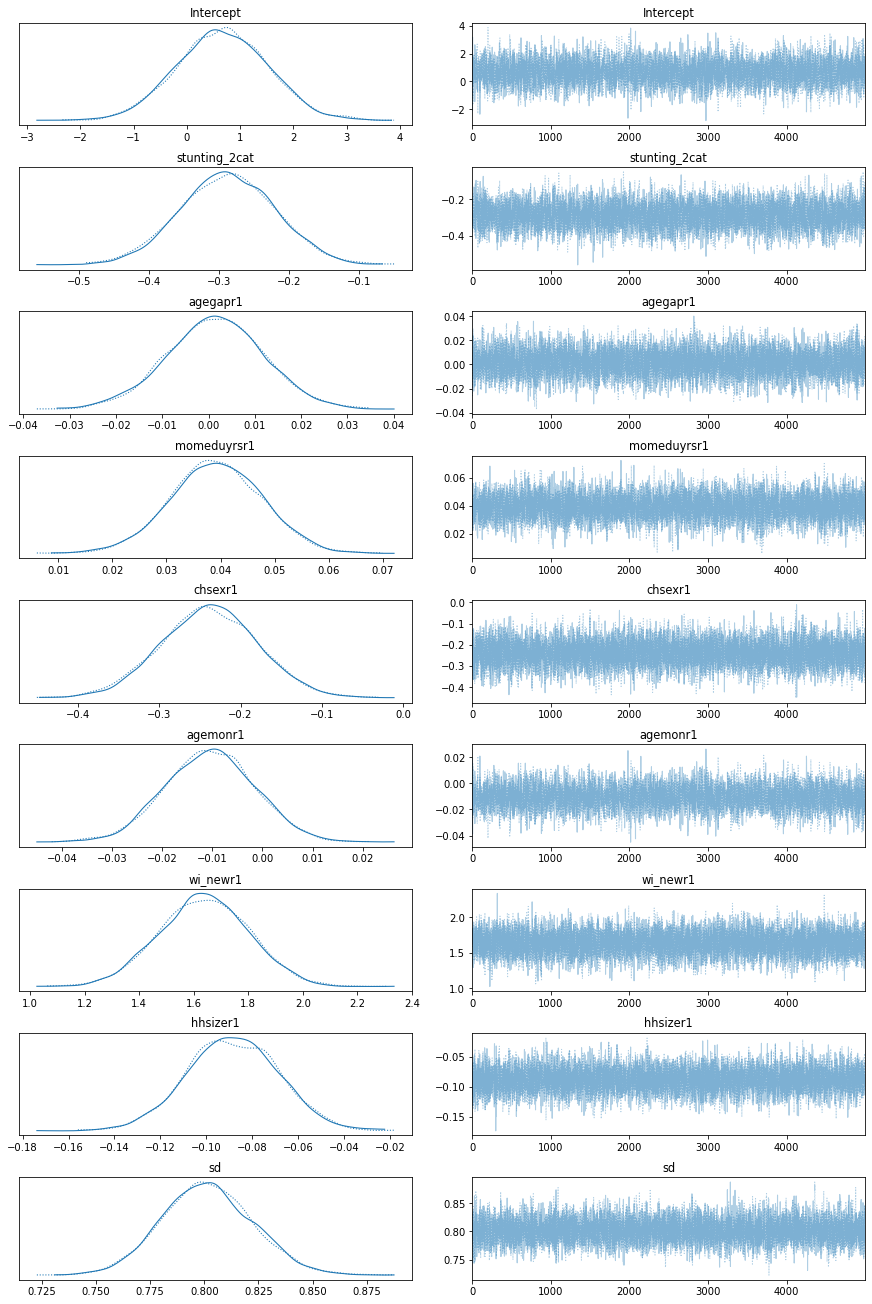

In [18]:
az.plot_trace(normal_trace)

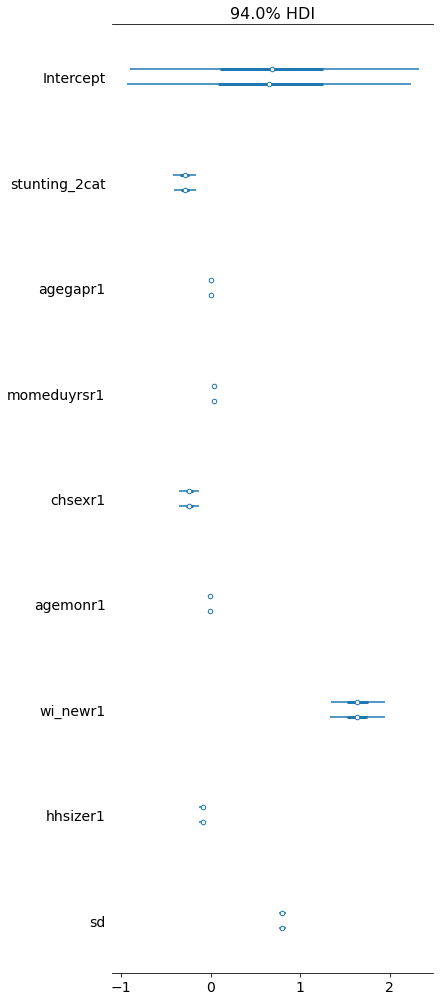

In [19]:
az.plot_forest(normal_trace);